In [486]:
#import usual libraries

import os
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [487]:
df = pd.read_csv('GSV_per_klant.csv', sep=';')


In [488]:
# make sure columns have clean names
df.columns = df.columns.str.strip()

In [489]:
# total GSV per Key_account per year
gsv_per_year = df.groupby(
    ["Key_account_cluster_onderdeel", "jaar"]
)["totale_GSV"].sum().reset_index()

print("Total GSV per key account per year:")
print(gsv_per_year)

Total GSV per key account per year:
    Key_account_cluster_onderdeel  jaar  totale_GSV
0                            Ahoy  2024        6555
1                          Albron  2023       82513
2                          Albron  2024       67088
3                          Albron  2025       45400
4                         AnyTyme  2023        1173
..                            ...   ...         ...
306                      Xandrion  2024     1150430
307                      Xandrion  2025     1116493
308                 YveY Catering  2023       15828
309                 YveY Catering  2024       14292
310                 YveY Catering  2025        3975

[311 rows x 3 columns]


In [490]:
gsv_per_year

,Key_account_cluster_onderdeel,jaar,totale_GSV
0,Ahoy,2024,6555
1,Albron,2023,82513
2,Albron,2024,67088
3,Albron,2025,45400
4,AnyTyme,2023,1173
...,...,...,...
306,Xandrion,2024,1150430
307,Xandrion,2025,1116493
308,YveY Catering,2023,15828
309,YveY Catering,2024,14292


In [491]:
# top 5 highest per year
top5_highest = gsv_per_year.groupby("jaar").apply(
    lambda x: x.nlargest(5, "totale_GSV")
).reset_index(drop=True)

top5_highest


C:\Users\Xenob\AppData\Local\Temp\ipykernel_17936\3445612238.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_highest = gsv_per_year.groupby("jaar").apply(


,Key_account_cluster_onderdeel,jaar,totale_GSV
0,Xandrion,2023,1041024
1,Center Parcs,2023,810466
2,De Efteling,2023,674752
3,Libéma,2023,564574
4,Gemaq,2023,485241
5,Xandrion,2024,1150430
6,Center Parcs,2024,860290
7,De Efteling,2024,648218
8,Libéma,2024,546809
9,Gemaq,2024,516633


In [492]:
# top 5 lowest per year
top5_lowest = gsv_per_year.groupby("jaar").apply(
    lambda x: x.nsmallest(5, "totale_GSV")
).reset_index(drop=True)

top5_lowest

C:\Users\Xenob\AppData\Local\Temp\ipykernel_17936\2803140492.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_lowest = gsv_per_year.groupby("jaar").apply(


,Key_account_cluster_onderdeel,jaar,totale_GSV
0,Droomparken,2023,22
1,VEP,2023,33
2,Eazie Holding BV,2023,40
3,Sandton Hotels,2023,66
4,Best Western Hotels,2023,70
5,Hampshire Hotels,2024,-92
6,Johnny’s Burger,2024,21
7,Circle K,2024,22
8,McDonald's,2024,26
9,NS,2024,26


C:\Users\Xenob\AppData\Local\Temp\ipykernel_17936\1659451991.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, "totale_GSV"))
C:\Users\Xenob\AppData\Local\Temp\ipykernel_17936\1659451991.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(5, "totale_GSV"))


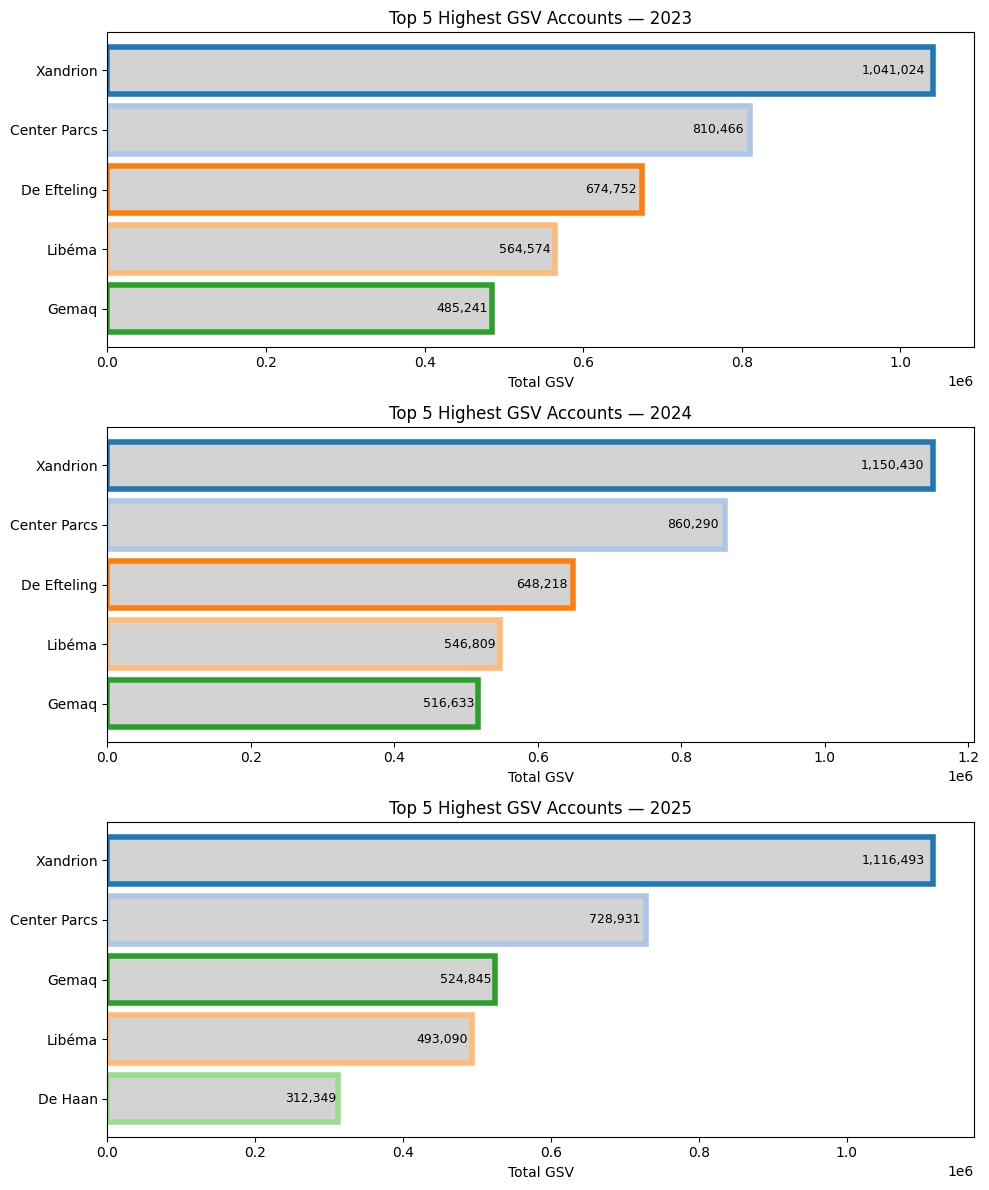

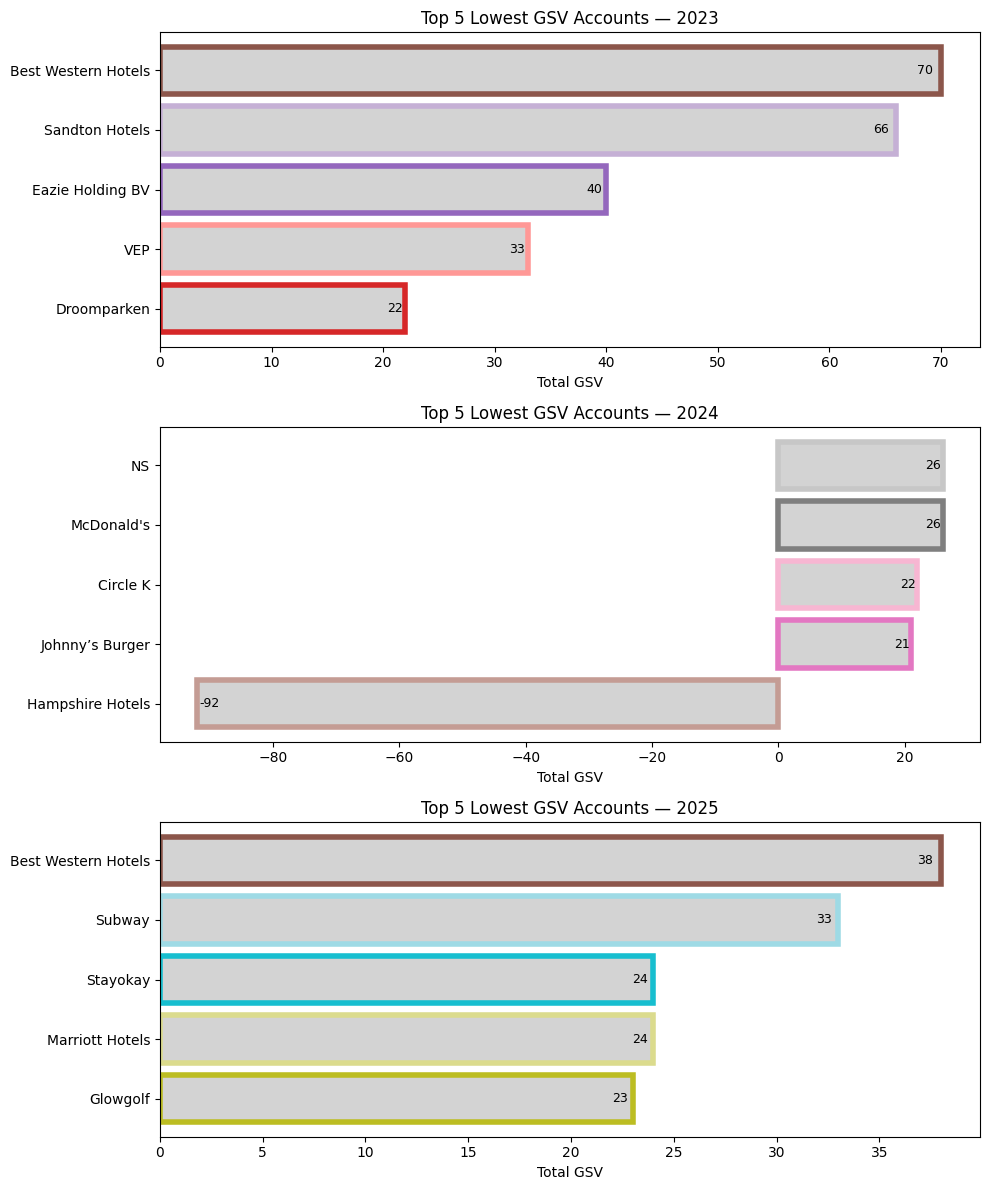

In [493]:
# recompute if needed
gsv_per_year = df.groupby(
    ["Key_account_cluster_onderdeel", "jaar"], as_index=False
)["totale_GSV"].sum()

# top/bottom 5 per year
top5_highest = (
    gsv_per_year.groupby("jaar", group_keys=False)
    .apply(lambda x: x.nlargest(5, "totale_GSV"))
    .reset_index(drop=True)
)
top5_lowest = (
    gsv_per_year.groupby("jaar", group_keys=False)
    .apply(lambda x: x.nsmallest(5, "totale_GSV"))
    .reset_index(drop=True)
)

# consistent colors for outlines
all_companies = pd.concat([top5_highest, top5_lowest])["Key_account_cluster_onderdeel"].unique()
colors = plt.cm.tab20.colors
color_map = {comp: colors[i % len(colors)] for i, comp in enumerate(all_companies)}

def plot_ranking(df, title):
    years = sorted(df["jaar"].unique())
    fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(10, 4*len(years)))

    if len(years) == 1:
        axes = [axes]

    for ax, year in zip(axes, years):
        data = df[df["jaar"] == year].sort_values("totale_GSV")

        # draw bars with grey fill + colored edge
        bars = ax.barh(
            data["Key_account_cluster_onderdeel"],
            data["totale_GSV"],
            color="lightgrey",
            edgecolor=[color_map[c] for c in data["Key_account_cluster_onderdeel"]],
            linewidth=4
        )

        ax.set_title(f"{title} — {year}")
        ax.set_xlabel("Total GSV")

        # annotate numbers (always black)
        for bar in bars:
            w = bar.get_width()
            txt = f"{w:,.0f}"
            if w > data["totale_GSV"].max() * 0.2:
                ax.text(w - (w * 0.01),
                        bar.get_y() + bar.get_height()/2,
                        txt, va="center", ha="right", color="black", fontsize=9)
            else:
                ax.text(w + (data["totale_GSV"].max() * 0.01),
                        bar.get_y() + bar.get_height()/2,
                        txt, va="center", ha="left", color="black", fontsize=9)

    plt.tight_layout()
    plt.show()

# plot highest and lowest separately
plot_ranking(top5_highest, "Top 5 Highest GSV Accounts")
plot_ranking(top5_lowest, "Top 5 Lowest GSV Accounts")


### Per Month

In [494]:
# total GSV per Key_account per year and month
gsv_per_month = df.groupby(
    ["Key_account_cluster_onderdeel", "jaar", "maand"]
)["totale_GSV"].sum().reset_index()

print("\nTotal GSV per key account per year per month:")
print(gsv_per_month)


Total GSV per key account per year per month:
     Key_account_cluster_onderdeel  jaar  maand  totale_GSV
0                             Ahoy  2024      2        6555
1                           Albron  2023      1        4163
2                           Albron  2023      2        3620
3                           Albron  2023      3        5397
4                           Albron  2023      4        5598
...                            ...   ...    ...         ...
2225                 YveY Catering  2025      4         783
2226                 YveY Catering  2025      5         377
2227                 YveY Catering  2025      6          72
2228                 YveY Catering  2025      7         930
2229                 YveY Catering  2025      8         203

[2230 rows x 4 columns]


In [495]:
gsv_per_month

,Key_account_cluster_onderdeel,jaar,maand,totale_GSV
0,Ahoy,2024,2,6555
1,Albron,2023,1,4163
2,Albron,2023,2,3620
3,Albron,2023,3,5397
4,Albron,2023,4,5598
...,...,...,...,...
2225,YveY Catering,2025,4,783
2226,YveY Catering,2025,5,377
2227,YveY Catering,2025,6,72
2228,YveY Catering,2025,7,930


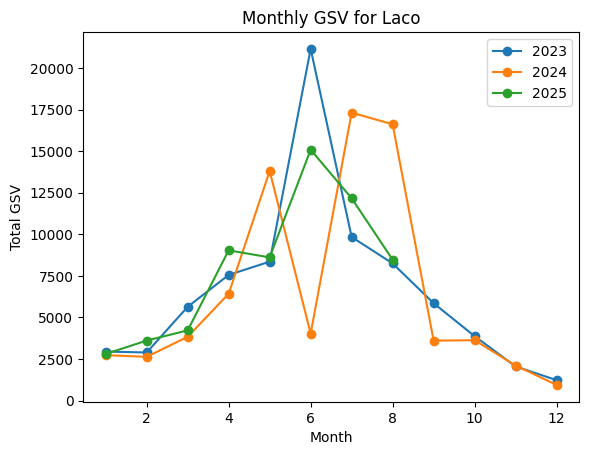

In [496]:
# plot per month (example: choose one account)
account_name = "Laco"  # change to the account you want

account_data = gsv_per_month[gsv_per_month["Key_account_cluster_onderdeel"] == account_name]

for year, data in account_data.groupby("jaar"):
    plt.plot(data["maand"], data["totale_GSV"], marker="o", label=f"{year}")

plt.title(f"Monthly GSV for {account_name}")
plt.xlabel("Month")
plt.ylabel("Total GSV")
plt.legend()
plt.show()

### Groei

In [497]:
df2 = pd.read_csv('GSV_growth_per_year.csv', sep=',')

In [498]:
df2

,segment,2023,2024,2025,Grand Total
0,Cateraars,1128395.67,881362.72,636285.75,2646044.14
1,Drinken,104182.73,117611.34,86360.66,308154.72
2,Eten,78319.04,86030.04,80012.95,244362.04
3,Evenementen,2402659.10,2333579.87,1936786.58,6673027.52
4,Grossiers,183801.31,169215.74,135145.81,488162.86
5,Leisure,367677.57,394034.75,761100.63,1523813.23
6,Leren,2479515.10,2310933.47,1518312.43,6308761.00
7,Not supported,79763.10,48868.69,46651.09,175145.19
8,Reizen,89856.85,79935.81,90255.80,260048.46
9,Shoppen food,848185.91,874077.16,1117290.69,2839983.99


In [499]:
import seaborn as sns

In [500]:
# --- Clean data (remove 'Grand Total') ---
df_clean = df2[df2['segment'] != 'Grand Total']

# Melt cleaned dataframe for plotting
df_melted = df_clean.melt(
    id_vars=['segment'],
    value_vars=['2023','2024','2025'],
    var_name='year',
    value_name='GSV'
)

# Pivot for checking variation
df_pivot = df_melted.pivot(index='year', columns='segment', values='GSV')

In [501]:
# --- Helper function to decide palette ---
def choose_palette(data, threshold=0.02):
    """
    If relative range (max-min)/mean <= threshold → greyscale,
    else → qualitative color palette.
    """
    ranges = (data.max() - data.min()) / data.mean()
    if ranges.max() <= threshold:
        return sns.color_palette("Greys", n_colors=len(data.columns))
    else:
        return sns.color_palette("tab20", n_colors=len(data.columns))

# Decide palette once
palette_segments = choose_palette(df_pivot)

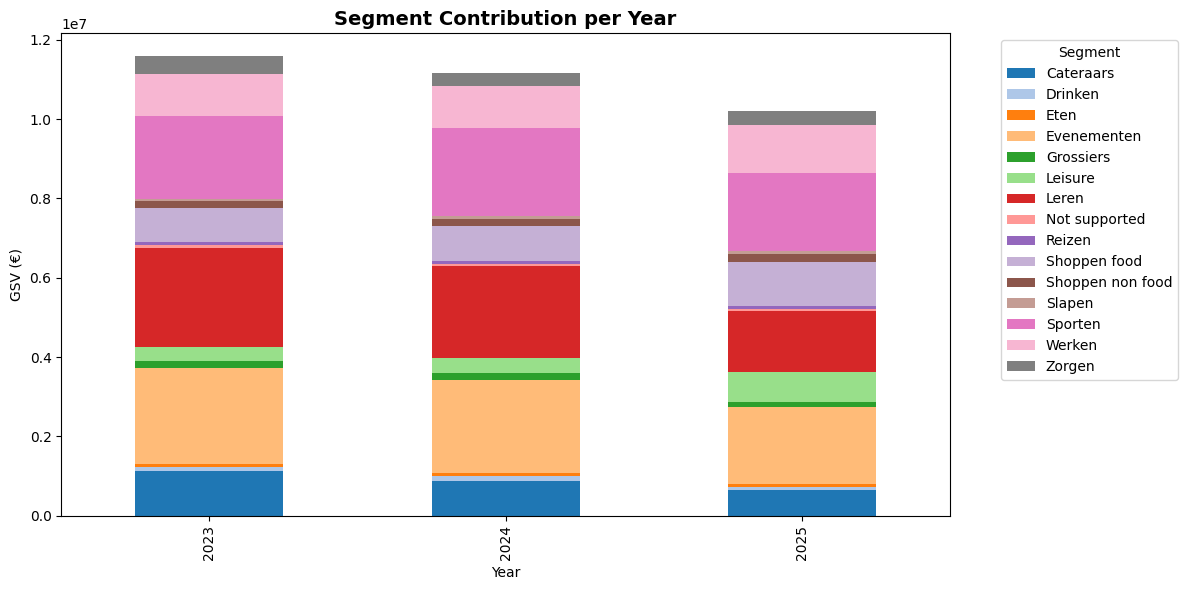

In [502]:
# --- 1. Stacked bar chart (contribution per segment) ---
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12,6), color=palette_segments)
plt.title("Segment Contribution per Year", fontsize=14, weight='bold')
plt.ylabel("GSV (€)")
plt.xlabel("Year")

# # Add grand total as a line
# grand_totals = df_pivot.sum(axis=1)
# plt.plot(range(len(grand_totals)), grand_totals, marker='o', color='black', linewidth=2, label='Grand Total')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Segment")
plt.tight_layout()
plt.show()

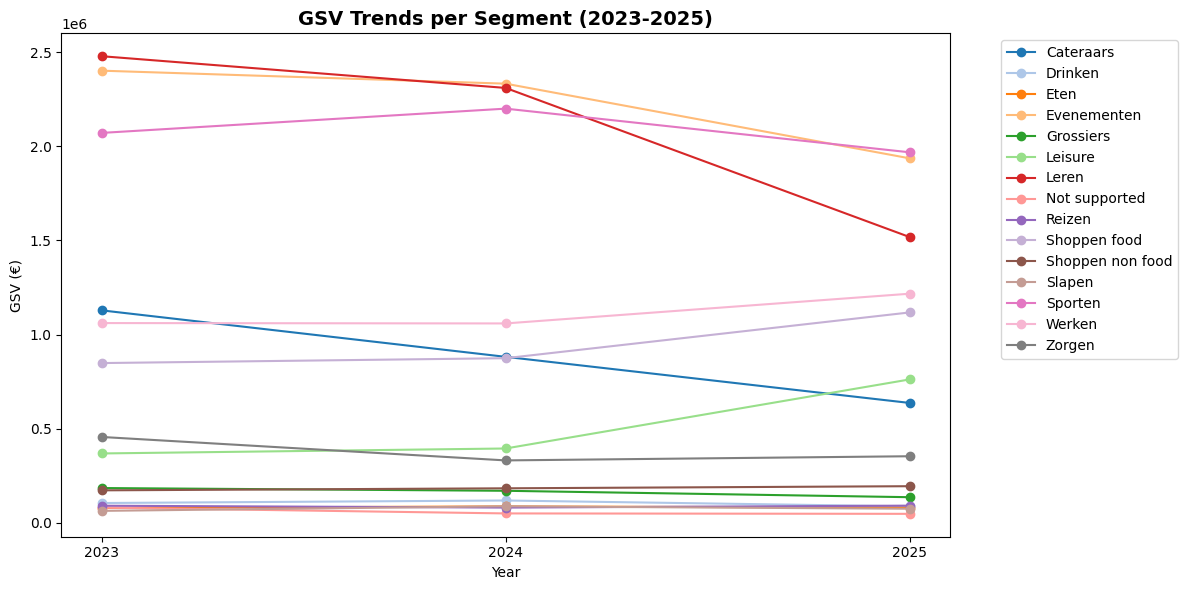

In [503]:
# --- 2. Line chart (trends per segment) ---
plt.figure(figsize=(12,6))
palette_line = choose_palette(df_pivot)

for i, seg in enumerate(df_clean['segment'].unique()):
    subset = df_melted[df_melted['segment'] == seg]
    plt.plot(subset['year'], subset['GSV'], marker='o', label=seg, color=palette_line[i])

plt.title("GSV Trends per Segment (2023-2025)", fontsize=14, weight='bold')
plt.ylabel("GSV (€)")
plt.xlabel("Year")

# # Add grand total line
# plt.plot(df_pivot.index, grand_totals, marker='o', color='black', linewidth=2, label='Grand Total')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

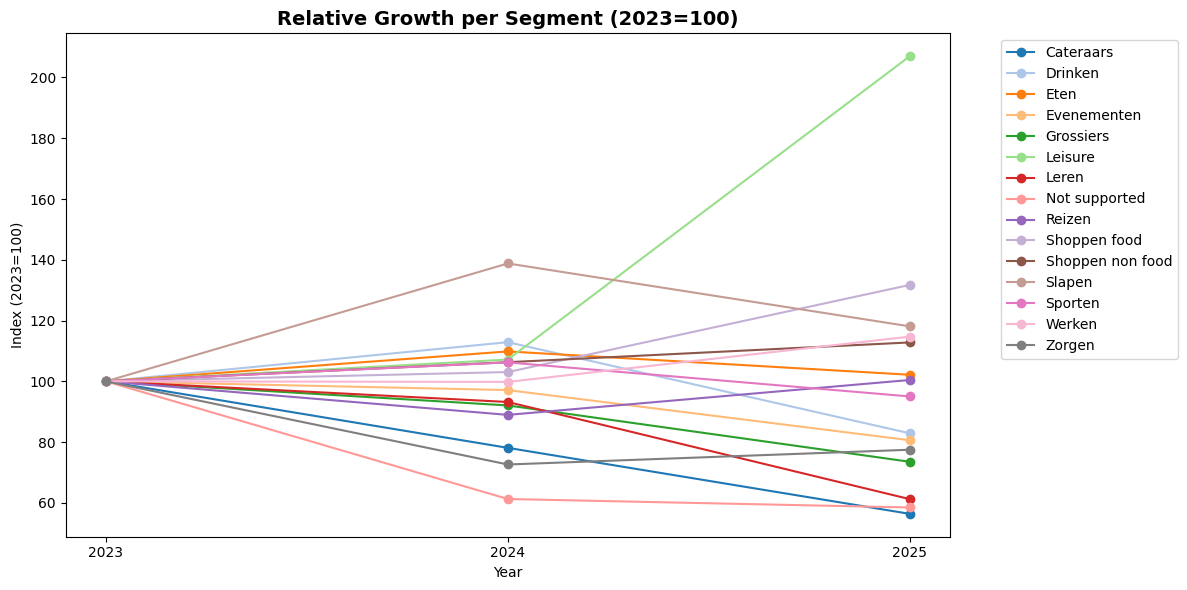

In [504]:
# --- 3. Normalized line chart (relative to 2023 = 100) ---
df_norm = df_melted.copy()
df_norm['GSV_index'] = df_norm.groupby('segment')['GSV'].transform(lambda x: x / x.iloc[0] * 100)

plt.figure(figsize=(12,6))
palette_norm = choose_palette(df_pivot)

for i, seg in enumerate(df_norm['segment'].unique()):
    subset = df_norm[df_norm['segment'] == seg]
    plt.plot(subset['year'], subset['GSV_index'], marker='o', label=seg, color=palette_norm[i])

plt.title("Relative Growth per Segment (2023=100)", fontsize=14, weight='bold')
plt.ylabel("Index (2023=100)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [505]:
df3 = pd.read_csv('icecream_sales.csv', sep=',')

In [506]:
# Find all year columns (including the messy ones like "2025;")
year_cols = [col for col in df3.columns if col.strip().startswith("202")]

def clean_numeric(col):
    return (
        df3[col]
        .astype(str)
        .str.replace(";", "", regex=False)
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
        .str.strip()
        .replace("", None)
        .astype(float)
    )

# Apply cleaning to all year columns
for col in year_cols:
    df3[col] = clean_numeric(col)

# Optionally: rename "2025;" → "2025"
df3 = df3.rename(columns=lambda x: x.replace(";", "").strip())

# remove row 36 - 39

df3 = df3.drop(index=[36, 37, 38, 39])

In [507]:
# Ensure all year columns are numeric
for col in df3.columns:
    if col.startswith("202"):
        df3[col] = pd.to_numeric(df3[col], errors="coerce").astype("Int64")

# Remove rows where 'Row Labels' is just digits 1-12
df3 = df3[~df3["Row Labels"].astype(str).str.fullmatch(r"\d{1,2}")]

# Reset index to ensure sequential assignment
df3 = df3.reset_index(drop=True)

# Assign months (repeating for Cornetto & Magnum pairs)
df3["month"] = ((df3.index // 2) + 1)


In [508]:
df3

,Row Labels,2023,2024,2025,month
0,Cornetto,33190,38693,37963,1
1,Magnum,76356,55650,67797,1
2,Cornetto,44320,46575,61990,2
3,Magnum,93108,77392,112748,2
4,Cornetto,89947,146140,164376,3
5,Magnum,208587,243905,312665,3
6,Cornetto,140171,171920,254272,4
7,Magnum,283901,319822,499269,4
8,Cornetto,258075,369383,279882,5
9,Magnum,526908,571698,521825,5


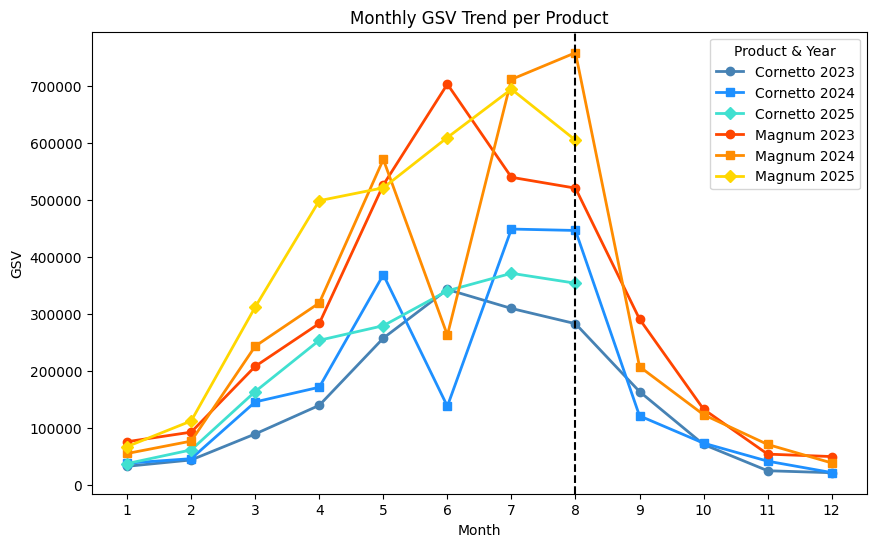

In [515]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Define custom palette for (product, year) combinations
palette = {
    ("Magnum", "2023"): "orangered",
    ("Magnum", "2024"): "darkorange",
    ("Magnum", "2025"): "gold",
    ("Cornetto", "2023"): "steelblue",
    ("Cornetto", "2024"): "dodgerblue",
    ("Cornetto", "2025"): "turquoise",
}

# Define markers per year
markers = {
    "2023": "o",
    "2024": "s",
    "2025": "D",
}

# Plot lines separately with markers
for (product, year), group in df_long.groupby(["Row Labels", "year"]):
    plt.plot(group["month"], group["GSV"], 
             label=f"{product} {year}", 
             color=palette[(product, year)], 
             marker=markers[year],
             linewidth=2)

# Ensure all months are shown on x-axis
all_months = sorted(df_long["month"].unique())
plt.xticks(all_months)

# Add vertical black line at month 8
plt.axvline(x=8, color='black', linestyle='--')

plt.title("Monthly GSV Trend per Product")
plt.ylabel("GSV")
plt.xlabel("Month")
plt.legend(title="Product & Year")
plt.show()
